## Helper Functions

In [1]:
import unicodecsv
import pprint


# Opens the file with the specified filepath. Filepath must be a raw string e.g r'string'
def open_file(filepath):
    with open(filepath, 'rb') as f:
        reader = unicodecsv.reader(f)
        return list(reader)   

    
# Returns the data for the past number of years the user specifies. 'data' must be a list 'no_of_years' must be integer
def get_last_eleven_years_data(data, no_of_years):
    return data[len(data)-no_of_years:]


# Takes a string which is either an empty string or represents a float, and returns a float or None.
def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i.replace(',',""))

    
# Takes a string which is either an empty string or represents an int, and returns an int or None.    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(float(i.replace(',',"")))
    

# Takes a list of strings which represents an int or empty strings, and returns a list of ints or list of Nones
def convert_all_int_or_float(list_of_str,type_to_convert_to):
    converted_list = []
    if type_to_convert_to == 'int':
        for string in list_of_str:
            converted_list.append(parse_maybe_int(string))
        return converted_list
    elif type_to_convert_to == 'float':
        for string in list_of_str:
            converted_list.append(parse_maybe_float(string))
        return converted_list
    else:
        print('The type argument entered can either be "int" or "float". Please enter the correct type')
        return None
    
        
    
#Converts NGN to USD
def convert_ngn_usd(naira):
    return naira / 360
      
    
#Converts a list of lists to a dict of dicts. Takes two arguments year_and_data and column_titles. year_and_data is a list of
#lists with each list representing a single row from the table. column_titles is a list containing the titles of individual
#columns in the table. It also has an optional year_is_first which is True by default assuming that the first cell in each row
#in your table hold the year of the data in other cells on the same row. 

def year_dict_for_data_columns(year_and_data,column_titles,year_is_first=True):
    from collections import deque
    try:
        dict_of_dict = {}
        no_of_columns = len(column_titles)
        year = None
        
        if year_is_first:
            
            for row in year_and_data:
             
                data = []
                for idx,item in enumerate(row):
                    if idx == 0:
                        year = parse_maybe_int(item)
                        #del(row[0])
                        continue
                                        
                    elif idx == len(row)-1:
                        data.append(parse_maybe_float(item))
                        title_data = {}
                        for i in range(no_of_columns):
                            title_data[column_titles[i]] = data[i]
                            
                        dict_of_dict[year] = title_data    
                        
                    else: data.append(parse_maybe_float(item))
                
                
        return dict_of_dict
    except TypeError:
        print('Either of the arguments is not a list')
        return None
    
#Returns a country data from a list where each list represents a single country and the name of the country is first item on list    
def find_and_return_country_data(data,country):
    country_data = None
    
    for item in data:
        if item[0] == country:
            country_data = item
            break
        
    return country_data


#Returns a dict of the growth rates in USD of a dict of data set
def get_growth_rate_usd(data,key=False):
    rate_by_year = {}
    values_list = list(data.values())
    keys_list = list(data.keys())
    
    if not key:    
        for i in range(len(values_list)):
            if i != 0:
                rate_by_year[keys_list[i]] = values_list[i] - values_list[i - 1]
        return rate_by_year
    
    else:
        for i in range(len(values_list)):
            if i != 0:
                rate_by_year[keys_list[i]] = values_list[i][key] - values_list[i - 1][key]
        return rate_by_year
        
        
#Returns a dict of the growth rates in % of a dict of data set
def get_growth_rate_percent(data,key=False):
    rate_by_year = {}
    values_list = list(data.values())
    keys_list = list(data.keys())
    
    if not key:    
        for i in range(len(values_list)):
            if i != 0:
                rate_by_year[keys_list[i]] = ((values_list[i] - values_list[i - 1]) / values_list[i - 1]) * 100
        return rate_by_year
    
    else:
        for i in range(len(values_list)):
            if i != 0:
                rate_by_year[keys_list[i]] = ((values_list[i][key] - values_list[i - 1][key]) / values_list[i - 1][key]) * 100
        return rate_by_year

#NB: GDP growth percent doesn't tally with the figures posted by World Bank    
    

    
# Searches a dict of dicts with key and returns a dict containing all values for that key.
def fetch_data_from_nested_dict(data,key):
    fetched_data = {}
    for year,data_point in data.items():
        fetched_data[year] = data_point[key]
    return fetched_data

###### -

## Importing And Cleaning GDP Data

In [18]:
   
#Reads the gdp csv file and stores it in gdp
gdp = open_file(r'C:\Users\Eva\Documents\Loctech\Business Development\Proposals\Python Machine Learning\Week 4\Data Science Project 1\20180509 Analyzing the credit worthiness of Nigeria\1. Original Data\GDP.csv')

#Deletes the empty rows from row 1 to row 7
del(gdp[0:7])

#Deletes the remaining empty rows at the end of the document
del(gdp[59:])


gdp_2010_2016 = get_last_eleven_years_data(gdp,7)
gdp_column_titles = ['GDP_growth_%',
                     'GDP_per_capita_growth_%',
                     'GDP_constant_lcu',
                     'GDP_per_capita_constant_lcu',
                     'GDP_current_lcu',
                     'GDP_current_usd',
                     'GDP_per_capita_current_usd',
                     'GDP_PPP_current_usd'
                    ]

nigeria_gdp_2010_2016 =  year_dict_for_data_columns(gdp_2010_2016,gdp_column_titles)
#pprint.pprint(nigeria_gdp_2010_2016)

# -

## Importing And Cleaning Budget Data

In [19]:
budget = open_file(r'C:\Users\Eva\Documents\Loctech\Business Development\Proposals\Python Machine Learning\Week 4\Data Science Project 1\20180509 Analyzing the credit worthiness of Nigeria\1. Original Data\budget.csv')

#Entering the title of the columns information was not in the original data but the source confirmed the order of the data
column_title_list = ['recurrent_budget','capital_budget','total_budget']

#Deleting 3 blank rows at the buttom of table
del(budget[len(budget)-3:])

#Get budget data for the last 11 years
budget_2010_2016 = get_last_eleven_years_data(budget,7)

#converting the list data to dictionary
budget_2010_2016_dict_naira = year_dict_for_data_columns(budget_2010_2016, column_title_list)

#Removing year 2009 since there was no data for that year
try:
    budget_2010_2016_dict_naira.pop(2009)
except KeyError:
    pass

nigeria_budget_2010_2016_usd = {}

for year,values in budget_2010_2016_dict_naira.items():
    recurrent_usd = convert_ngn_usd(values['recurrent_budget'])
    capital_usd = convert_ngn_usd(values['capital_budget'])
    total_usd = convert_ngn_usd(values['total_budget'])
    
    nigeria_budget_2010_2016_usd[year] = {'recurrent_budget':recurrent_usd,
                             'capital_budget':capital_usd,
                             'total_budget':total_usd
                            }
#pprint.pprint(nigeria_budget_2010_2016_usd)

## -

## Importing And Cleaning External Debt Data

In [20]:
debt = open_file(r'C:\Users\Eva\Documents\Loctech\Business Development\Proposals\Python Machine Learning\Week 4\Data Science Project 1\20180509 Analyzing the credit worthiness of Nigeria\1. Original Data\debt.csv')

del(debt[0:4]) #Deletes first 4 irrelevant rows in the table

debt_file_column_title = debt[0]

#Return the debt data for Nigeria
nigeria_debt_data = find_and_return_country_data(debt,'Nigeria') 

#Removing the first 4 columns data since I don't need it for analysis
del(debt_file_column_title[0:4])
del(nigeria_debt_data[0:4])

#Removing the last 2 columns data since I don't need it for analysis
del(debt_file_column_title[len(debt_file_column_title)-2:])
del(nigeria_debt_data[len(nigeria_debt_data)-2:])

#Get the debt data for the last 11 years
debt_column_title_2010_2016 = get_last_eleven_years_data(debt_file_column_title,7)
debt_2010_2016 = get_last_eleven_years_data(nigeria_debt_data,7)

#Convert all data to the relevant data types
debt_column_title_2010_2016 = convert_all_int_or_float(debt_column_title_2010_2016,'int')
debt_2010_2016 = convert_all_int_or_float(debt_2010_2016,'int')


#Create a dictionary with the various years as keys and the corresponding debts amounts as values
nigeria_debt_2010_2016_usd = dict(zip(debt_column_title_2010_2016,debt_2010_2016))

#pprint.pprint(nigeria_debt_2010_2016_usd)

## -

## Importing And Cleaning Foreign Reserve Data

In [21]:
foreign_reserve = open_file(r'C:\Users\Eva\Documents\Loctech\Business Development\Proposals\Python Machine Learning\Week 4\Data Science Project 1\20180509 Analyzing the credit worthiness of Nigeria\1. Original Data\Foriegn_reserve.csv')

del(foreign_reserve[0:4])

foreign_reserve_column_title = foreign_reserve[0]

#Search and return debt data for Nigeria.
nigeria_foreign_reserve_data = find_and_return_country_data(foreign_reserve,'Nigeria')

#Removing the first 4 columns data since it's not needed for the analysis
del(foreign_reserve_column_title[0:4])
del(nigeria_foreign_reserve_data[0:4])

#Removing the last 2 columns data since it's not needed for the analysis
del(foreign_reserve_column_title[len(foreign_reserve_column_title)-2:])
del(nigeria_foreign_reserve_data[len(nigeria_foreign_reserve_data)-2:])

#Get the last 11 years foreign reserve data for Nigeria.
foreign_reserve_title_2010_2016 = get_last_eleven_years_data(foreign_reserve_column_title,7)
nigeria_foreign_reserve_2010_2016 = get_last_eleven_years_data(nigeria_foreign_reserve_data,7)

#Converts all data to appropriate data types
foreign_reserve_title_2010_2016 = convert_all_int_or_float(foreign_reserve_title_2010_2016,'int')
nigeria_foreign_reserve_2010_2016 = convert_all_int_or_float(nigeria_foreign_reserve_2010_2016,'float')

#Create a dictionary with the various years as keys and the corresponding foreign reserves amounts as values
nigeria_foreign_reserve_2010_2016_usd = dict(zip(foreign_reserve_title_2010_2016,nigeria_foreign_reserve_2010_2016))

#pprint.pprint(nigeria_foreign_reserve_2010_2016_usd)

## -

## Further Cleaning of all data sets

In [22]:
#Observing all the for data sets we have cleaned so far (nigeria_gdp_2010_2016_usd,nigeria_budget_2010_2016_usd,
#nigeria_debt_2010_2016_usd and nigeria_foreign_reserve_2010_2016_usd) we can observe that nigeria_budget_2010_2016_usd
#does not have any data for year 2009. So to avoid introducing error into our analysis we will exclude year 2009 from 
#all data sets we are working with

try:
    nigeria_gdp_2010_2016.pop(2009)
    nigeria_debt_2010_2016_usd.pop(2009)
    nigeria_foreign_reserve_2010_2016_usd.pop(2009)
    
except KeyError:
    pass


#pprint.pprint(nigeria_gdp_2010_2016)
#pprint.pprint(nigeria_budget_2010_2016_usd)
#pprint.pprint(nigeria_debt_2010_2016_usd)
#pprint.pprint(nigeria_foreign_reserve_2010_2016_usd)


#Removing year 2009 since there was no data for that year
#budget_2010_2016_dict_naira.pop(2009)

###### -

## Calculating All Required Indicators

In [7]:
# Finding the following indicators for all data sets GDP:
#   a - individual growth rate for each year (in %)
#   b - individual growth rate for each year (in USD)
#   c - average growth rate for each year (in %)
#   d - average growth rate for each year (in USD)
#   e - total growth rate for each year (in %)
#   f - total growth rate for each year (in USD)



#Fetching GDP Growth percentage from nigeria_gdp_2010_2016
gdp_growth_rate_percent = fetch_data_from_nested_dict(nigeria_gdp_2010_2016,'GDP_growth_%')


#for year,gdp_data in nigeria_gdp_2010_2016.items():
#    gdp_growth_rate_percent[year] = gdp_data['GDP_growth_%']

#Remove 2010 data as it is not available for other indicators
try:
    gdp_growth_rate_percent.pop(2010)
except KeyError:
    pass

#Getting the gdp growth in usd
gdp_growth_rate_usd = get_growth_rate_usd(nigeria_gdp_2010_2016,'GDP_current_usd')

gdp_yearly_growth_rates_percent = list(gdp_growth_rate_percent.values())
gdp_yearly_growth_rates_usd = list(gdp_growth_rate_usd.values())

gdp_total_growth_percent = sum(gdp_yearly_growth_rates_percent)
gdp_total_growth_usd = sum(gdp_yearly_growth_rates_usd)

gdp_av_growth_percent = sum(gdp_yearly_growth_rates_percent) / len(gdp_yearly_growth_rates_percent)
gdp_av_growth_usd = sum(gdp_yearly_growth_rates_usd) / len(gdp_yearly_growth_rates_usd)


#pprint.pprint(gdp_growth_rate_percent)
#pprint.pprint(gdp_growth_rate_usd)
#print(gdp_yearly_growth_rates_usd)
#print(gdp_total_growth_percent)
#print(gdp_total_growth_usd)
#print(gdp_av_growth_percent)
#print(gdp_av_growth_usd)

In [8]:
# Finding the following indicators for all data sets - Budget:
#   a - individual growth rate for each year (in %)
#   b - individual growth rate for each year (in USD)
#   c - average growth rate for each year (in %)
#   d - average growth rate for each year (in USD)
#   e - total growth rate for each year (in %)
#   f - total growth rate for each year (in USD)

budget_growth_rate_percent = get_growth_rate_percent(nigeria_budget_2010_2016_usd,'total_budget')

budget_growth_rate_usd = get_growth_rate_usd(nigeria_budget_2010_2016_usd,'total_budget')


budget_yearly_growth_rates_percent = list(budget_growth_rate_percent.values())
budget_yearly_growth_rates_usd = list(budget_growth_rate_usd.values())

budget_total_growth_percent = sum(budget_yearly_growth_rates_percent)
budget_total_growth_usd = sum(budget_yearly_growth_rates_usd)

budget_av_growth_percent = sum(budget_yearly_growth_rates_percent) / len(budget_yearly_growth_rates_percent)
budget_av_growth_usd = sum(budget_yearly_growth_rates_usd) / len(budget_yearly_growth_rates_usd)


#pprint.pprint(budget_growth_rate_percent)
#pprint.pprint(budget_growth_rate_usd)

#print(budget_yearly_growth_rates_usd)
#print(budget_total_growth_percent)
#print(budget_total_growth_usd)
#print(budget_av_growth_percent)
#print(budget_av_growth_usd)

In [9]:
# Finding the following indicators for all data sets debt:
#   a - individual growth rate for each year (in %)
#   b - individual growth rate for each year (in USD)
#   c - average growth rate for each year (in %)
#   d - average growth rate for each year (in USD)
#   e - total growth rate for each year (in %)
#   f - total growth rate for each year (in USD)

debt_growth_rate_percent = get_growth_rate_percent(nigeria_debt_2010_2016_usd)

debt_growth_rate_usd = get_growth_rate_usd(nigeria_debt_2010_2016_usd)


debt_yearly_growth_rates_percent = list(debt_growth_rate_percent.values())
debt_yearly_growth_rates_usd = list(debt_growth_rate_usd.values())

debt_total_growth_percent = sum(debt_yearly_growth_rates_percent)
debt_total_growth_usd = sum(debt_yearly_growth_rates_usd)

debt_av_growth_percent = sum(debt_yearly_growth_rates_percent) / len(debt_yearly_growth_rates_percent)
debt_av_growth_usd = sum(debt_yearly_growth_rates_usd) / len(debt_yearly_growth_rates_usd)


#pprint.pprint(debt_growth_rate_percent)
#pprint.pprint(debt_growth_rate_usd)

#print(debt_yearly_growth_rates_usd)
#print(debt_total_growth_percent)
#print(debt_total_growth_usd)
#print(debt_av_growth_percent)
#print(debt_av_growth_usd)

In [10]:
# Finding the following indicators for all data sets - foreign_reserve:
#   a - individual growth rate for each year (in %)
#   b - individual growth rate for each year (in USD)
#   c - average growth rate for each year (in %)
#   d - average growth rate for each year (in USD)
#   e - total growth rate for each year (in %)
#   f - total growth rate for each year (in USD)

foreign_reserve_growth_rate_percent = get_growth_rate_percent(nigeria_foreign_reserve_2010_2016_usd)

foreign_reserve_growth_rate_usd = get_growth_rate_usd(nigeria_foreign_reserve_2010_2016_usd)


foreign_reserve_yearly_growth_rates_percent = list(foreign_reserve_growth_rate_percent.values())
foreign_reserve_yearly_growth_rates_usd = list(foreign_reserve_growth_rate_usd.values())

foreign_reserve_total_growth_percent = sum(foreign_reserve_yearly_growth_rates_percent)
foreign_reserve_total_growth_usd = sum(foreign_reserve_yearly_growth_rates_usd)

foreign_reserve_av_growth_percent = sum(foreign_reserve_yearly_growth_rates_percent) / len(foreign_reserve_yearly_growth_rates_percent)
foreign_reserve_av_growth_usd = sum(foreign_reserve_yearly_growth_rates_usd) / len(foreign_reserve_yearly_growth_rates_usd)


#pprint.pprint(foreign_reserve_growth_rate_percent)
#pprint.pprint(foreign_reserve_growth_rate_usd)

#print(foreign_reserve_yearly_growth_rates_usd)
#print(foreign_reserve_total_growth_percent)
#print(foreign_reserve_total_growth_usd)
#print(foreign_reserve_av_growth_percent)
#print(foreign_reserve_av_growth_usd)

###### -

## Visualizing The Insights

In [11]:
import matplotlib
import matplotlib.pyplot as plt

#Helper functions for visualization

#A function that takes a list of values to be plotted and returns a list of lists. The returned list item contains two lists.
#The first list contains only positive values while the second list contains only negative values all from the orignal list.
#the positions where the negative values were in the orginal list is replaced with 0 in the postive list.
#Also the positions where the positive values were in the original list is replaced with 0 in the positive list.

def separate_positive_data_from_negative(data_list):
    positive_data = []
    negative_data = []

    for data in data_list:
        if data < 0:
            negative_data.append(data)
            positive_data.append(0)
        elif data == 0:
            negative_data.append(0)
            positive_data.append(0)
        else:
            negative_data.append(0)
            positive_data.append(data)
            
    return [positive_data,negative_data]

#A function that a dictionary of keys:values and plots the growth rate of the values against the keys.

def growth_plot(growth_rate,title,x_label='Years',y_label='Currency (in billion USD)'):
    try:
        years = list(growth_rate.keys())
        
        weighted_positive_values = [x/1000000000 for x in separate_positive_data_from_negative(list(growth_rate.values()))[0]]
        weighted_negative_values = [x/1000000000 for x in separate_positive_data_from_negative(list(growth_rate.values()))[1]]

        fig = plt.figure(1, figsize=(20,9))
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
        ax = plt.subplot(111)
        ax.bar(years,weighted_negative_values, width=0.5, color='r' )
        ax.bar(years,weighted_positive_values, width=0.5, color='b' )
        
    except TypeError:
        print('Please enter the appropriate type')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


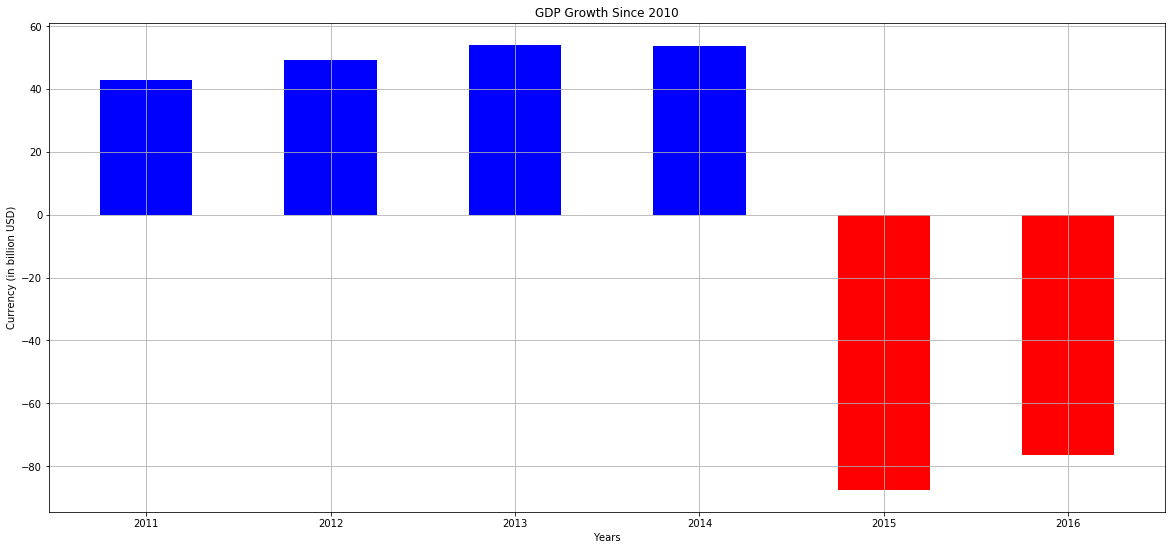

In [12]:
# Plotting the growth of gdp from 2010 to 2016

growth_plot(gdp_growth_rate_usd,'GDP Growth Since 2010')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


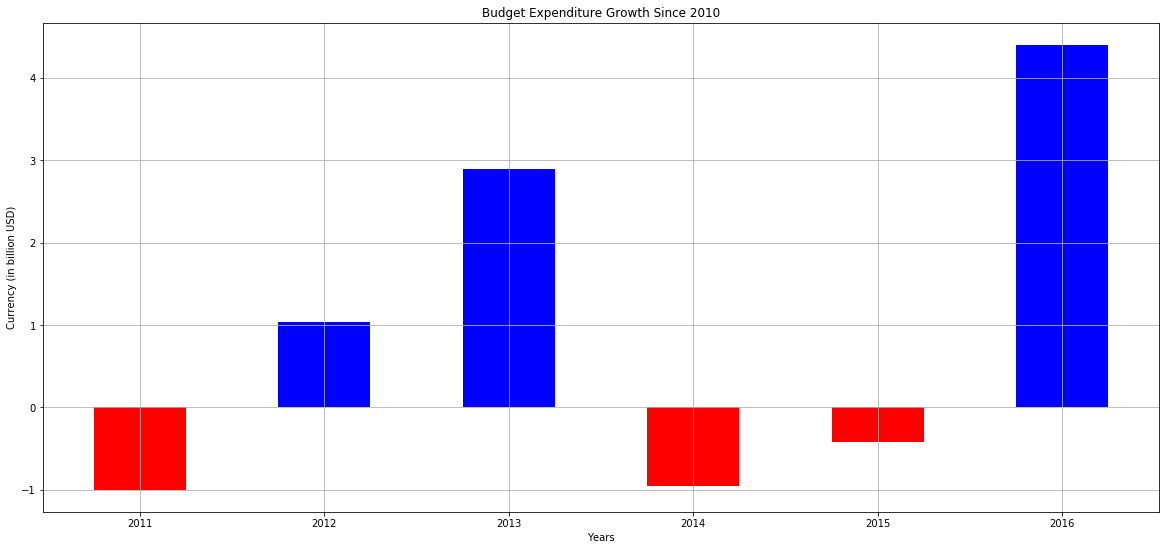

In [13]:
# Plotting a graph of Budget growth since 2010 to 2016

growth_plot(budget_growth_rate_usd,'Budget Expenditure Growth Since 2010')

###### -

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


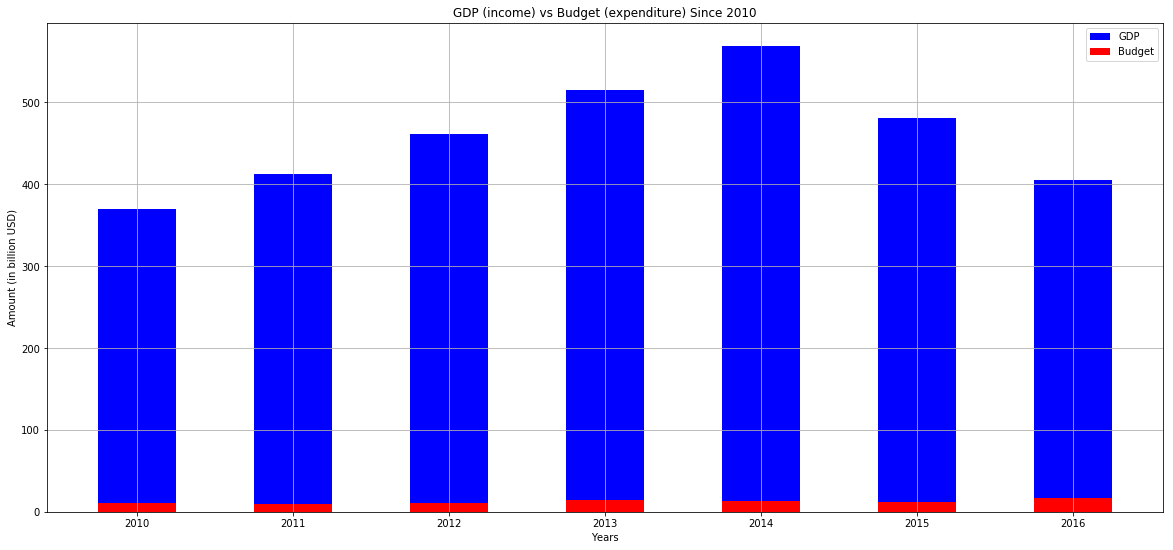

In [14]:
# Plotting a graph of GDP and Budget for each year



    
    
    
    
years3 = list(nigeria_gdp_2010_2016.keys())

gdp_values = list(fetch_data_from_nested_dict(nigeria_gdp_2010_2016,'GDP_current_usd').values())
budget_values = list(fetch_data_from_nested_dict(nigeria_budget_2010_2016_usd,'total_budget').values())

weighted_gdp_values = [x/1000000000 for x in gdp_values]
weighted_budget_values = [x/1000000000 for x in budget_values]


no_of_bars2 = len(years3)

plt.figure(1, figsize=(20,9))
plt.title("GDP (income) vs Budget (expenditure) Since 2010")
plt.xlabel('Years')
plt.ylabel('Amount (in billion USD)')
plt.grid(True)
ax = plt.subplot(111)
gdp_bar = ax.bar(years3,weighted_gdp_values, width=0.5, color='b', align='center')
budget_bar = ax.bar(years3,weighted_budget_values, width=0.5, color='r', align='center')
ax.legend ((gdp_bar, budget_bar),('GDP','Budget'))



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


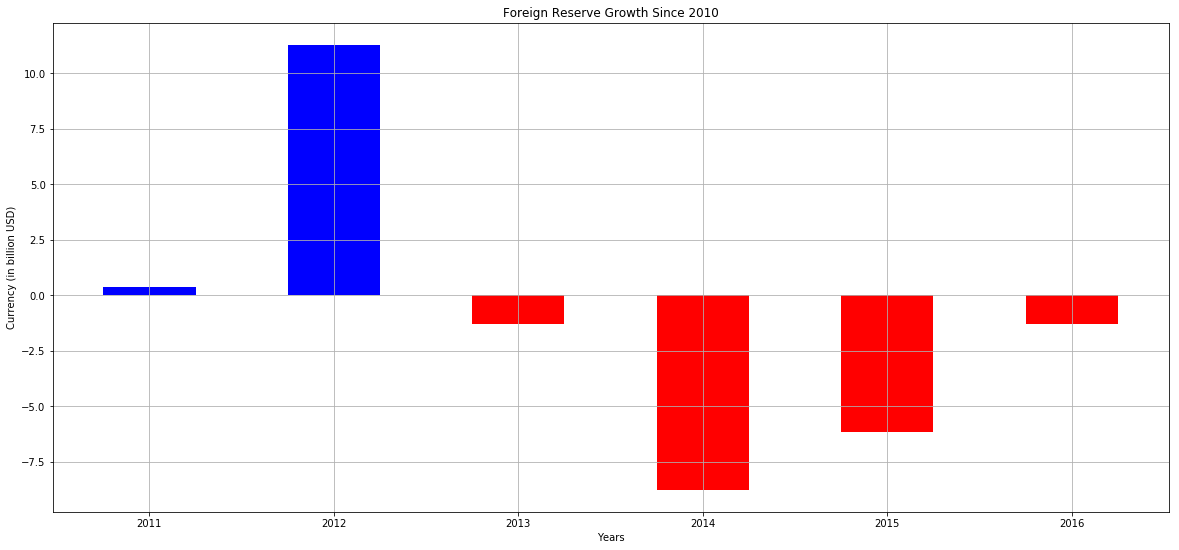

In [15]:
#Plotting a graph of foreign reserve growth since 2010

growth_plot(foreign_reserve_growth_rate_usd,'Foreign Reserve Growth Since 2010')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


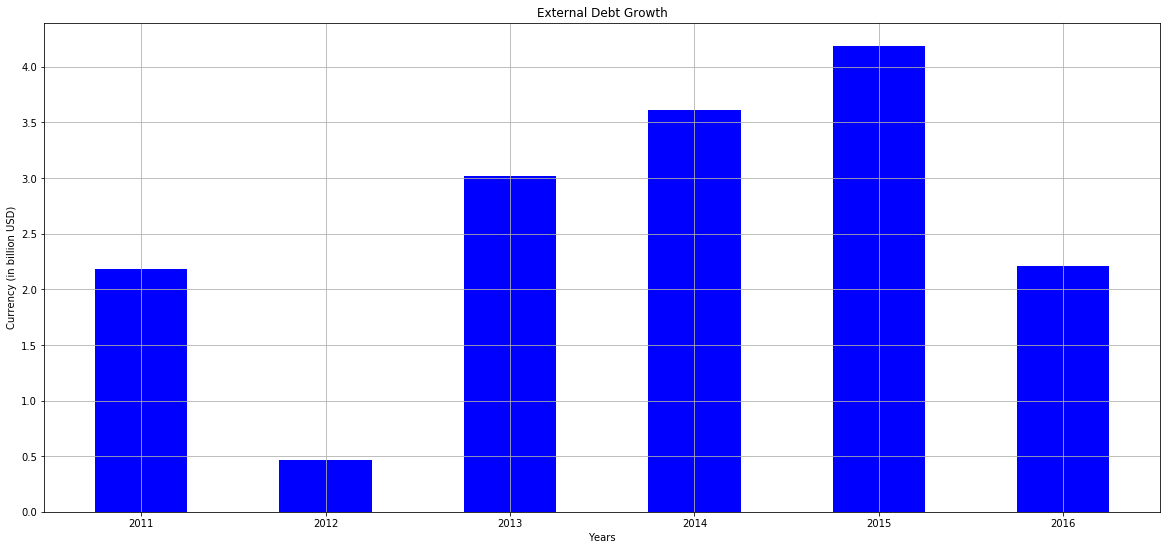

In [16]:
#Plotting a graph of debt increase growth since 2010

growth_plot(debt_growth_rate_usd,'External Debt Growth')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


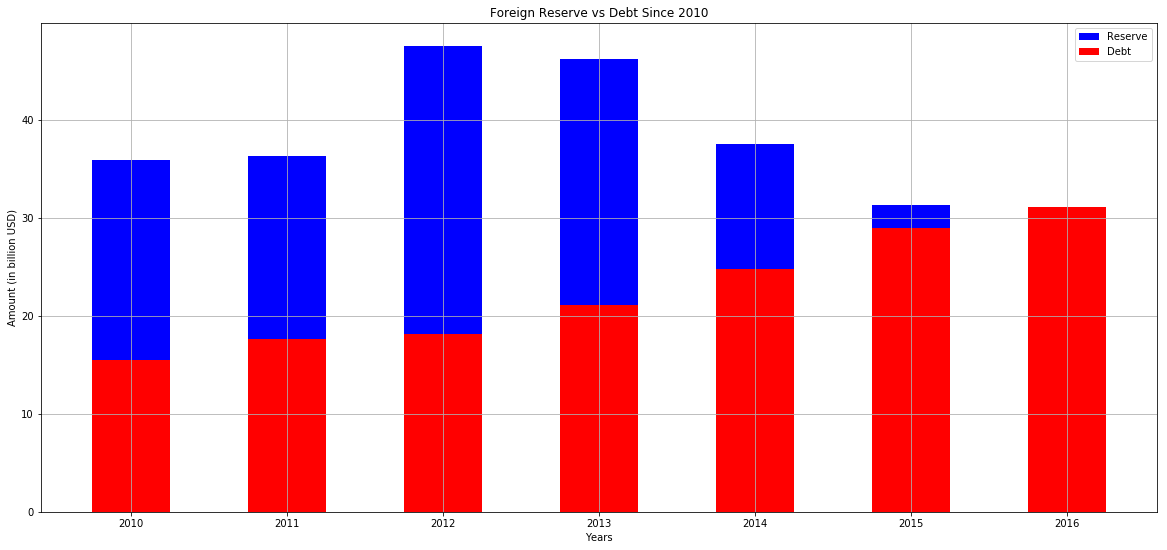

In [17]:
# Plotting a graph of Foreign Reserve and debt for each year


def combined_plot(dict_1,dict_2,name_1,name_2,title,x_label='Years',y_label='Amount (in billion USD)'):
    x_values = list(dict_1.keys())

    y1_values = list(dict_1.values())
    y2_values = list(dict_2.values())
    
        
    weighted_gdp_values = [x/1000000000 for x in y1_values]
    weighted_budget_values = [x/1000000000 for x in y2_values]


    #no_of_bars2 = len(years3)

    plt.figure(1, figsize=(20,9))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    ax = plt.subplot(111)
    y1_bar = ax.bar(x_values,weighted_gdp_values, width=0.5, color='b', align='center')
    y2_bar = ax.bar(x_values,weighted_budget_values, width=0.5, color='r', align='center')
    ax.legend ((y1_bar, y2_bar),(name_1, name_2))


combined_plot(nigeria_foreign_reserve_2010_2016_usd, nigeria_debt_2010_2016_usd,name_1='Reserve',name_2='Debt',title="Foreign Reserve vs Debt Since 2010")

## Recommendations

Based on the graphs we can see that the GDP has consistently grown above the Nigerian budget by a huge margin which is an indication that the country won't go bankrupt anytime soon. So we are not expecting a repeat of the situation in Greece or Venezuela in Africa's biggest economy. So with alot of budget excesses the government should have enough money to repay the debts but surprising that is not the case here. 

With the steady increase in GDP there has been a steady increase in debt and a decline in foreign reserves which makes me wonder what the budget excesses are used for. You might need to seek for additional data from the Nigerian government to find out how the budget excesses in these years are utilized.

However I have some reservation about the Nigerian government in terms of spending discipline. Between 2012 and 2016, the GDP has grown consistently but the foreign reserve has always depreciated in thesame time frame. Also there has been a consistent rise in the debt profile of Nigeria which currently stands above $30bn. These debts could have been reduced with budget exceeses but that is not the case.

I strongly recommend that you must demand to see the breakdown of government disbursements of budget excess 